In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from PIL import Image

In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [3]:
#cmap = plt.get_cmap('Blues')
#cmap = truncate_colormap(cmap, 0.0, 0.6)
cmap = colors.LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0,   'white'),
                                                  (0.6, 'blue'),
                                                  (1,   'green')], N=512)
#cmap = truncate_colormap(cmap, 0.0, 0.6)

In [116]:
image = 'skyline3'

In [117]:
# loading image
img = cv2.imread(f'input/{image}.jpg',)

### Laplacian

In [110]:
# Remove noise by blurring with a Gaussian filter
img_blur = cv2.GaussianBlur(img, (131, 131), 0)

In [111]:
# Blur
img_grey = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)

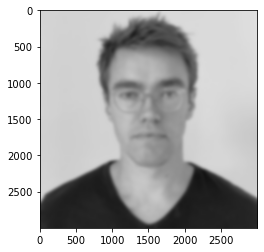

In [112]:
plt.imshow(cv2.cvtColor(img_grey, cv2.COLOR_BGR2RGB))

In [113]:
# Lap
img_lap = cv2.Laplacian(img_grey, cv2.CV_8U, ksize=17)

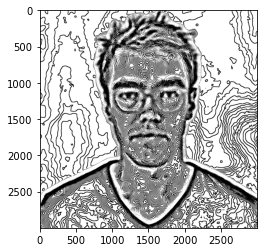

In [114]:
plt.imshow(255-cv2.cvtColor(img_lap, cv2.COLOR_BGR2RGB))

In [115]:
im = 255 - cv2.cvtColor(img_lap, cv2.COLOR_BGR2RGB)
cv2.imwrite(f"output/{image}_lap.jpeg", im)

True

### Pencil Sketch

In [118]:
# CV2 pencil sketch
#img_pS_grey, img_pS = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.20, shade_factor=0.039)
img_pS_grey, img_pS = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.35, shade_factor=0.025)


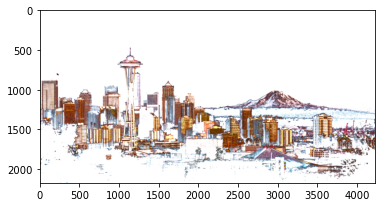

In [119]:
plt.imshow(cv2.cvtColor(img_pS, cv2.COLOR_BGR2RGB))

In [121]:
im = img_pS
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
cv2.imwrite(f"output/{image}_ps.jpeg", im)

True

### Pencil Sketch color

In [94]:
# # Tresh
# ret, img_tresh = cv2.threshold(img_pS_grey, 140, 255, cv2.THRESH_TOZERO)

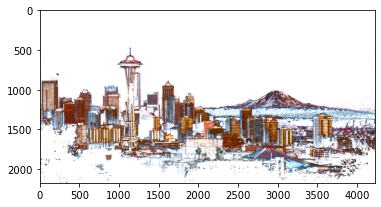

In [143]:
img_pS_RGB = cv2.cvtColor(img_pS, cv2.COLOR_BGR2RGB)
plt.imshow(img_pS_RGB, cmap=cmap)

In [78]:
im = cmap(img_pS_RGB)
im = cv2.normalize(im, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
cv2.imwrite(f"output/{image}_ps_color.jpeg", im)

NameError: name 'img_pS_RGB' is not defined

In [ ]:
im = cmap(img_tresh)
im = cv2.normalize(im, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
cv2.imwrite(f"output/{image}_ps.jpeg", im)

In [150]:
# #im = cmap(img_tresh)
# im = img_pS_RGB
# im = Image.fromarray((im * 255).astype(np.uint8))
# im = im.convert('RGB')
# im.save(f"output/{image}_ps.jpeg", optimize=True, quality=40)

In [ ]:
resume_data = {
}